Dataset + code altrui: https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
Tranfer Learning + Data Augmentation: https://www.tensorflow.org/tutorials/images/transfer_learning
Questo code: https://www.kaggle.com/indhusree/traffic-signal-predection-cnn

In [22]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import pathlib
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import  PIL
from PIL import  ImageEnhance , ImageOps , Image
from matplotlib import pyplot
import tensorflow as tf
from keras.models import Sequential
from tensorflow.keras.preprocessing import image
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam

In [2]:
#plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
#plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
#plt.style.use("ggplot")

In [3]:
data_dir = 'archive'
train_path = data_dir + '/Train'
test_path = data_dir + '/'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [4]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

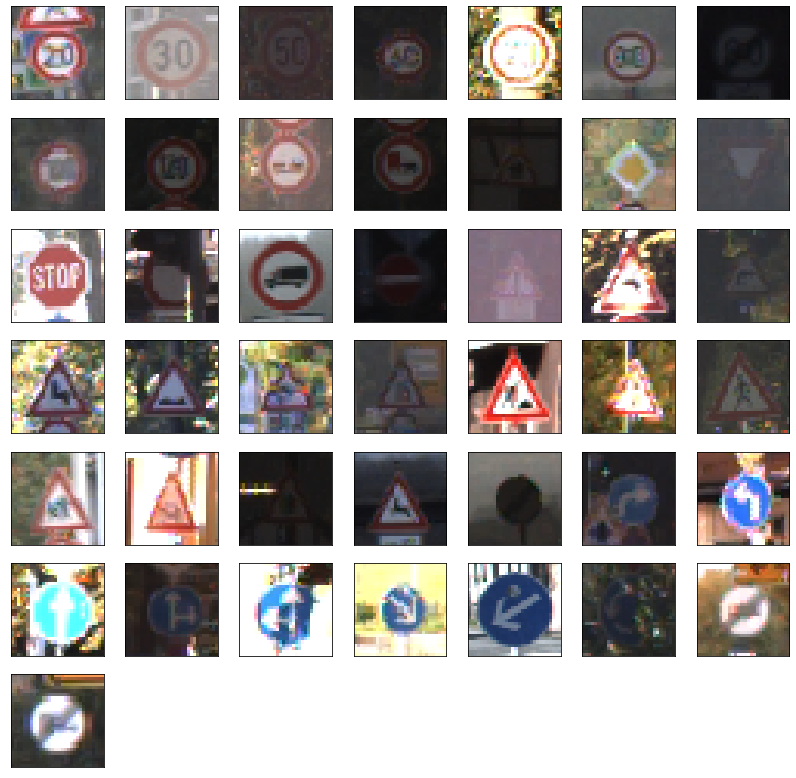

In [5]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH,IMG_HEIGHT))
    plt.imshow(img)
plt.show()

In [60]:
"""
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip('horizontal'),
  tf.keras.layers.RandomRotation(0.2),
])

img = load_img(train_path + "/0/00000_00000_00000.png", target_size=(IMG_WIDTH,IMG_HEIGHT))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  image = tf.expand_dims(img, 0)
  print(image.shape[0])
  augmented_image = data_augmentation(image)
  plt.imshow(augmented_image[0] / 255)
  plt.axis('off')
"""

'\ndata_augmentation = tf.keras.Sequential([\n  tf.keras.layers.RandomFlip(\'horizontal\'),\n  tf.keras.layers.RandomRotation(0.2),\n])\n\nimg = load_img(train_path + "/0/00000_00000_00000.png", target_size=(IMG_WIDTH,IMG_HEIGHT))\nfor i in range(9):\n  ax = plt.subplot(3, 3, i + 1)\n  image = tf.expand_dims(img, 0)\n  print(image.shape[0])\n  augmented_image = data_augmentation(image)\n  plt.imshow(augmented_image[0] / 255)\n  plt.axis(\'off\')\n'

In [6]:
# Label Overview
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }

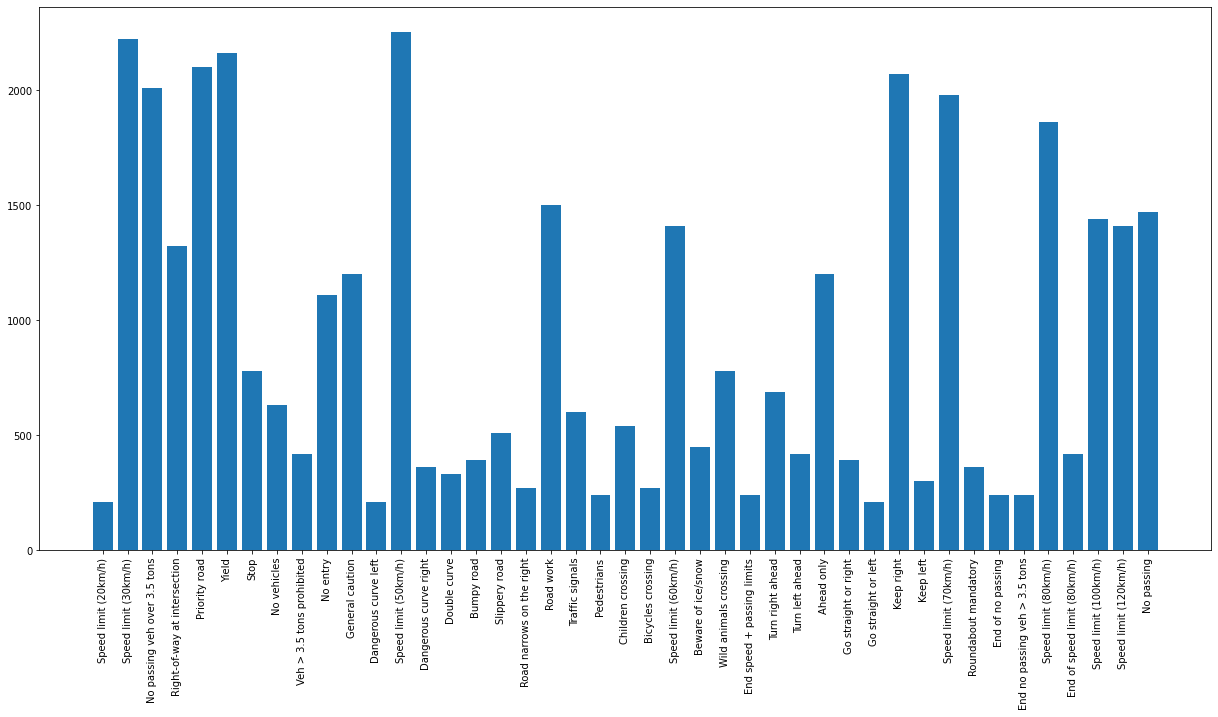

In [7]:
folders = os.listdir(train_path)


train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])



plt.figure(figsize=(21,10))  
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

In [8]:
def load_data(data_dir):


    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels

In [9]:
images, labels = load_data(train_path)

In [10]:
labels = to_categorical(labels)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.3)

In [12]:
x_train/=255
x_test/=255
print('x_train shape:',x_train.shape)
print('Number of images in x_train',x_train.shape[0])
print('Number of images in x_test',x_test.shape[0])

x_train shape: (27446, 30, 30, 3)
Number of images in x_train 27446
Number of images in x_test 11763


In [13]:
print('x_train shape:',x_test.shape)

x_train shape: (11763, 30, 30, 3)


In [14]:
input_shape=( 30, 30, 3)

In [15]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

# Compiling the model


lr = 0.001
epochs = 30
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 64)          0

In [16]:
history = model.fit(x_train, y_train,validation_split=0.3,epochs=20)

Epoch 1/20
601/601 [==============================] - 9s 15ms/step - loss: 1.9345 - accuracy: 0.4539 - val_loss: 0.6876 - val_accuracy: 0.8026
Epoch 2/20
601/601 [==============================] - 9s 15ms/step - loss: 0.5494 - accuracy: 0.8290 - val_loss: 0.2853 - val_accuracy: 0.9192
Epoch 3/20
601/601 [==============================] - 9s 15ms/step - loss: 0.3114 - accuracy: 0.9039 - val_loss: 0.1669 - val_accuracy: 0.9542
Epoch 4/20
601/601 [==============================] - 9s 15ms/step - loss: 0.2326 - accuracy: 0.9283 - val_loss: 0.1442 - val_accuracy: 0.9599
Epoch 5/20
601/601 [==============================] - 9s 15ms/step - loss: 0.1765 - accuracy: 0.9426 - val_loss: 0.1129 - val_accuracy: 0.9724
Epoch 6/20
601/601 [==============================] - 9s 15ms/step - loss: 0.1407 - accuracy: 0.9560 - val_loss: 0.0920 - val_accuracy: 0.9780
Epoch 7/20
601/601 [==============================] - 9s 15ms/step - loss: 0.1154 - accuracy: 0.9626 - val_loss: 0.0768 - val_accuracy: 0.9784

In [17]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

368/368 [==============================] - 1s 3ms/step - loss: 0.0559 - accuracy: 0.9864
test set accuracy:  98.63980412483215


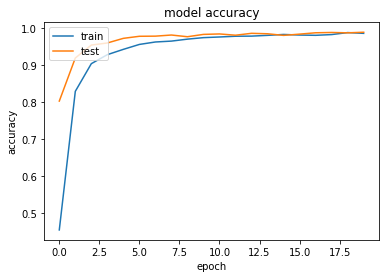

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

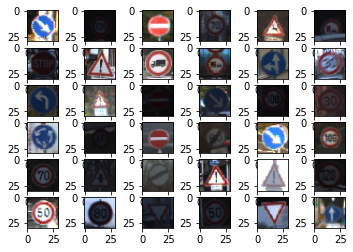

In [19]:
for i in range(36):
  pyplot.subplot(6,6,i+1)
  pyplot.imshow(x_test[i])

2700
The predicted image is No passing


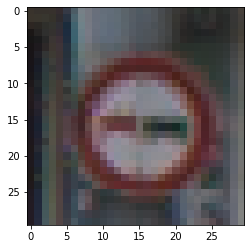

In [20]:
image_index= np.random.randint(0,x_test.shape[0])
plt.imshow(x_test[image_index])
n = np.array(x_test[image_index])
print(n.size)
p = n.reshape(1, 30, 30, 3)
pred = classes[model.predict(p).argmax()]

print("The predicted image is {}".format(pred))